In [52]:
from build.sabre import CouplingCircuit
from build.sabre import Backend as Backend_cpp
from build.sabre import Model as Model_cpp
from build.sabre import SabreLayout as SabreLayout_cpp 
from build.sabre import SabreRouting as SabreRouting_cpp
from build.sabre import DAGCircuit as DAGCircuit_cpp
from build.sabre import CouplingCircuit as CouplingCircuit_cpp
from build.sabre import InstructionNode as InstructionNode_cpp
from build.sabre import Layout as Layout_cpp

import numpy as np
import time

import sys
sys.path.append("/Users/air/workspace/qusteed")
from qusteed.dag.dag_circuit import DAGCircuit
from qusteed.passes.mapping.routing.sabre_routing import SabreRouting
from qusteed.passes.model import Model
from qusteed.backends.backend import Backend
from qusteed.passes.datadict import DataDict
from qusteed.dag.circuit_dag  import circuit_to_dag, dag_to_circuit, draw_dag
from qusteed.dag.instruction_node import InstructionNode 
from qusteed.graph.couplinggraph import CouplingGraph
from qusteed.utils.random_circuit import RandomCircuit 

from main import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
c_circuit, c_circuit_cpp = test_coupling()

model = get_preset_model()

qc = get_random_qc()
dag = circuit_to_dag(qc)
draw_dag(dag)

dag_cpp = dag_to_cppDag(dag)
#dag_cpp.draw_self()

Backend Created
Model with backend created


---- python ----
python-time: 0.016064167022705078


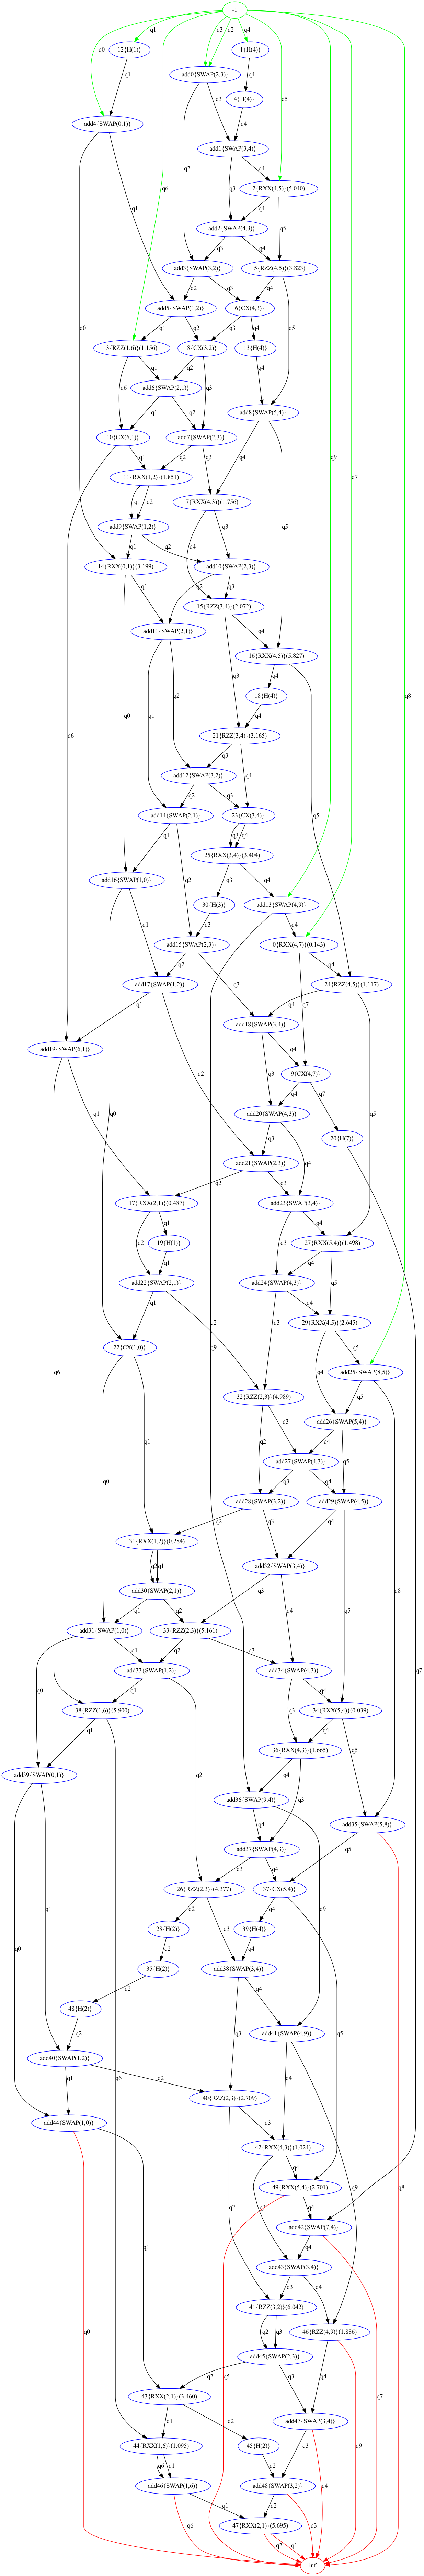

In [57]:
print("---- python ----")
sabre_routing = SabreRouting()
sabre_routing.modify_dag = True
sabre_routing.set_model(model)
st = time.time()
map_dag = sabre_routing.run(dag)
print(f"python-time: {time.time()-st}")
draw_dag(map_dag)


In [98]:
# draw_dag(map_dag)

In [58]:
print("----  c++   ----")
model_cpp = Model_cpp() 
model_cpp.init_layout =  Layout_cpp(sabre_routing.model._layout["initial_layout"].v2p)
sabre_routing_cpp = SabreRouting_cpp(c_circuit_cpp)
sabre_routing_cpp.modify_dag = True
sabre_routing_cpp.set_model(model_cpp)
st = time.time()
mapped_dag_cpp = sabre_routing_cpp.run(dag_cpp)
print(f"cpp-time: {time.time()-st}")
# mapped_dag_cpp.draw_self()
# dag_cpp.print_self()

----  c++   ----
cpp-time: 0.0026302337646484375


In [59]:
mapped_dag_cpp.draw_self()

-- drawing --
